# Scaling

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Transform numerical data into same range (typically small). Some method may work best with scaling
ex. KNN, Neural Network, Linear Model
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [ ]:
tips = sns.load_dataset('tips')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


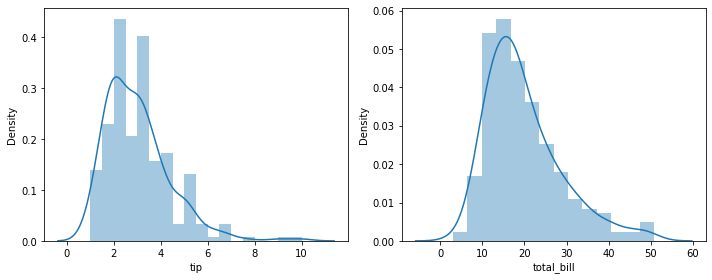

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()

In [ ]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


from illustration above, you can see the range and descriptive statistics of each variables, tips and total bill. we will transform these variables into smaller range using:
- min max scaler
- standard scaler
- robust scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
X = tips[['tip','total_bill']]

In [ ]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

> ## MinMax

Transform each variable to Range 0 - 1

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}



In [ ]:
X_minmax = minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=['tip','total_bill'])
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [ ]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


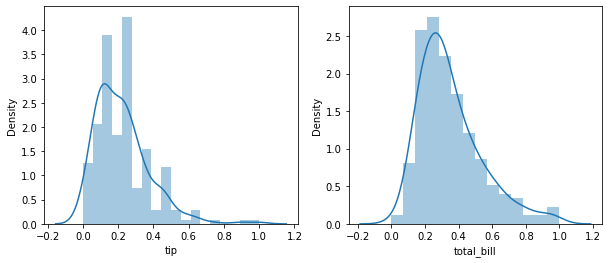

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_minmax['tip'])
plt.subplot(1,2,2)
sns.distplot(X_minmax['total_bill'])

from illustration above, you can see that min max scaler method has transformed each varables into range 0 to 1.

> ## StandardScaler

Transform each variabels to : mean = 0 stdev =  1

\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}

In [ ]:
X_standard = standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=['tip','total_bill'])
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [ ]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


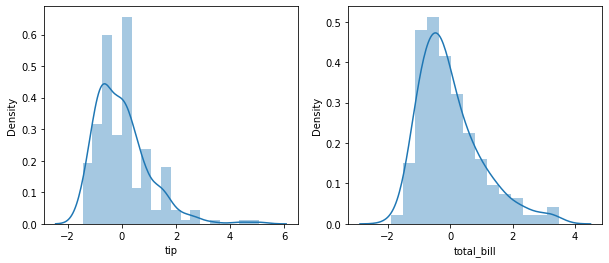

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['tip'])
plt.subplot(1,2,2)
sns.distplot(X_standard['total_bill'])

from illustration above, you can see that standard scaler method has transformed each varables into mean = 0 and std = 1.

> ## RobustScaler

Transform each variabel into small range

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}



In [ ]:
X_robust = robust.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns=['tip','total_bill'])
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [ ]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


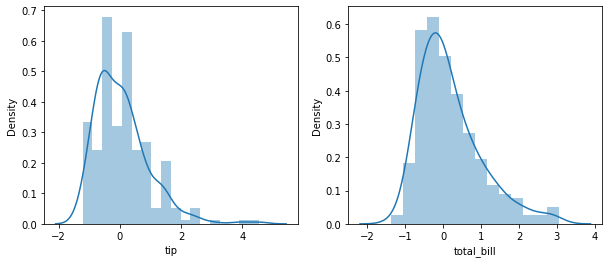

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_robust['tip'])
plt.subplot(1,2,2)
sns.distplot(X_robust['total_bill'])

from illustration above, you can see that standard scaler method has transformed each varables into smaller range.

# Encoding

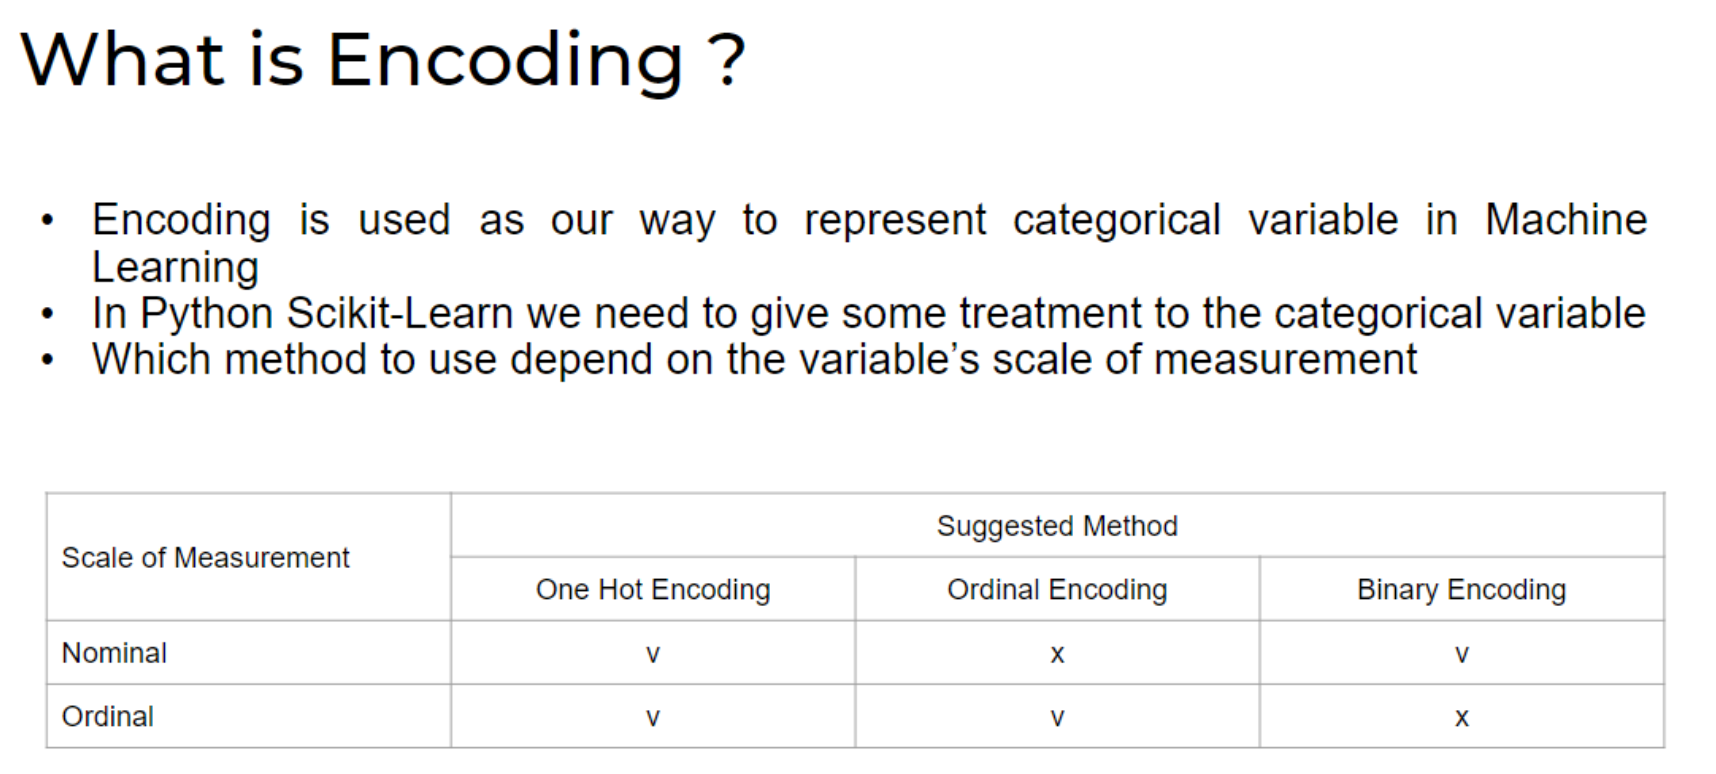

> ## Pandas Get Dummies 

One Hot Encoding using pd.get_dummies

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
for i in ['sex','smoker','day','time']:
  print(tips[i].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


these are the variables that we will transform into dummy variables. Sex two categories, smoker two categories, day four categories and time two categories. For each categories we will make one dummy variable.

In [ ]:
tips_dummy = pd.get_dummies(tips, columns = ['sex','smoker','day','time'])

In [ ]:
tips_dummy

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


You can clearly see that each variables now has dummy variables as many as the number of category.

> ## One Hot Encoding

One Hot Encoding also can be implemented using sklearn library. we use OneHotEncoder and ColumnTransformer classes. OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

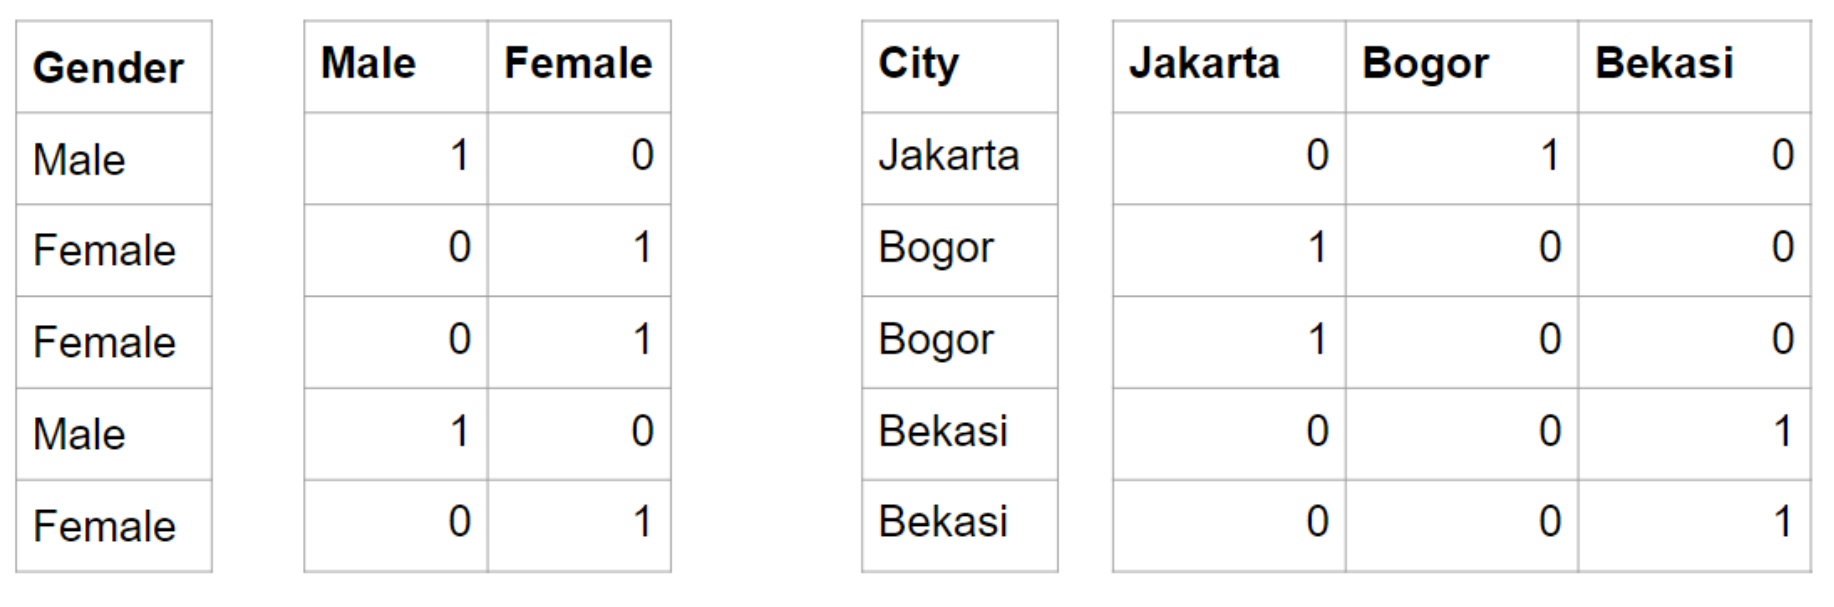

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
transformer = ColumnTransformer([
                                 ('encoder',OneHotEncoder(),['sex','smoker','day','time'])
                                ])

In [ ]:
tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded = tips_encoded.astype(int)
tips_encoded

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,0,1,0,0,1,0
240,1,0,0,1,0,1,0,0,1,0
241,0,1,0,1,0,1,0,0,1,0
242,0,1,1,0,0,1,0,0,1,0


Using this method you don't automatically rename the variables. You must get the name of the feature separately. But, in the later course you will find out that preprocessing method from skelarn can make your whole process of the modeling easier for: cross validation and hyperparameter tuning.

In [ ]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [ ]:
tips_encoded.columns = transformer.get_feature_names()
tips_encoded = pd.concat([tips[['total_bill','tip','size']],tips_encoded], axis = 1)
tips_encoded

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


> ## Ordinal Encoding .map

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.

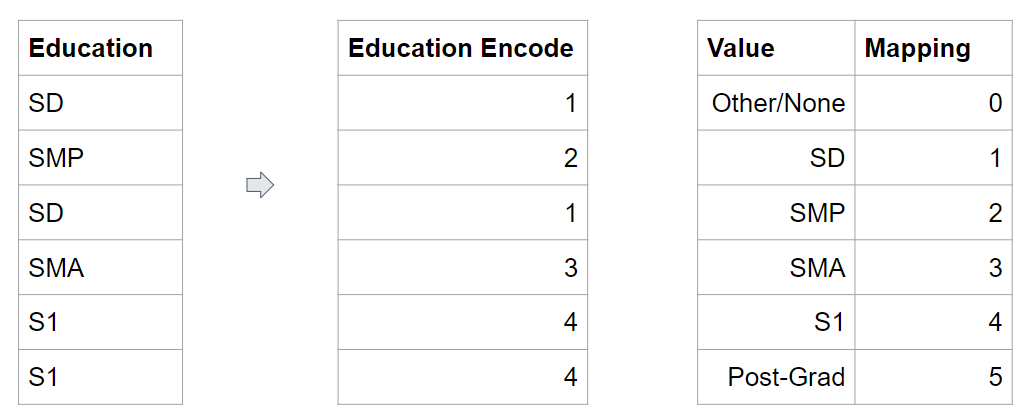

In [ ]:
tips_ordinal_encoded = tips.copy()

In [ ]:
tips_ordinal_encoded['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({'Fri':1,'Thur':2,'Sat':3,'Sun':4}) 

In [ ]:
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


Illustration above is the implementation of ordinal encoding using .map function. 

> ## Ordinal Encoding category_encoders library

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day',mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [ ]:
tips_ordinal_encoded = pd.concat([ tips[['total_bill','tip','sex','smoker','time','size']], dford], axis = 1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,time,size,day
0,16.99,1.01,Female,No,Dinner,2,4
1,10.34,1.66,Male,No,Dinner,3,4
2,21.01,3.50,Male,No,Dinner,3,4
3,23.68,3.31,Male,No,Dinner,2,4
4,24.59,3.61,Female,No,Dinner,4,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,3
240,27.18,2.00,Female,Yes,Dinner,2,3
241,22.67,2.00,Male,Yes,Dinner,2,3
242,17.82,1.75,Male,No,Dinner,2,3


In [ ]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}},
    {'col':'time',
     'mapping':{None:0,'Lunch':1,'Dinner':2}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = ['day','time'],mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips[['day','time']])
dford

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


In [ ]:
tips_ordinal_encoded = pd.concat([ tips[['total_bill','tip','sex','smoker','size']], dford], axis = 1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,size,day,time
0,16.99,1.01,Female,No,2,4,2
1,10.34,1.66,Male,No,3,4,2
2,21.01,3.50,Male,No,3,4,2
3,23.68,3.31,Male,No,2,4,2
4,24.59,3.61,Female,No,4,4,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,3,2
240,27.18,2.00,Female,Yes,2,3,2
241,22.67,2.00,Male,Yes,2,3,2
242,17.82,1.75,Male,No,2,3,2


> ## Binary Encoding

Binary encoding using category_encoder library. We will implement binary ecoding using the category_encoders library. We will implement binary encoding to day variable.

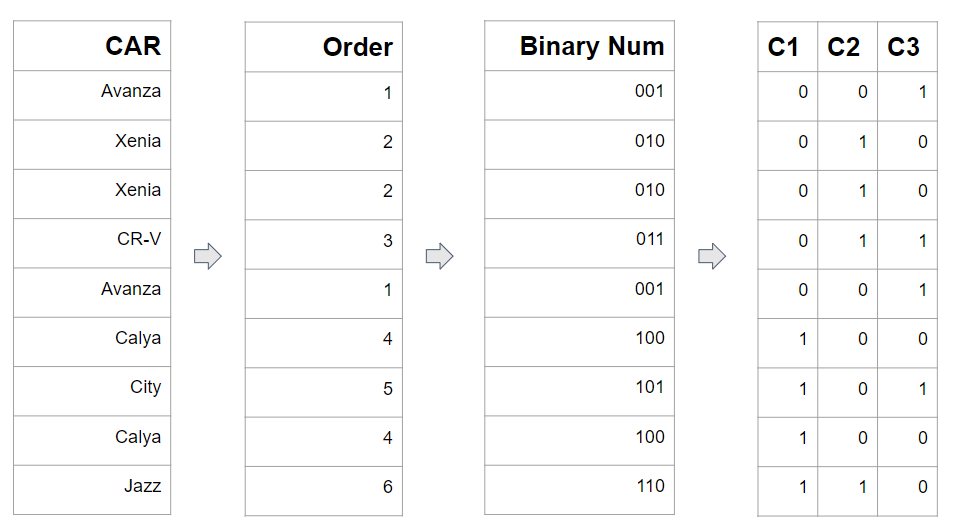

In [ ]:
import category_encoders as ce

In [ ]:
binary_encoder = ce.BinaryEncoder(cols = ['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [ ]:
tips_binary_encoded = pd.concat([ tips[['total_bill','tip','sex','smoker','time','size']], dfbin], axis = 1)
tips_binary_encoded

,total_bill,tip,sex,smoker,time,size,day_0,day_1,day_2
0,16.99,1.01,Female,No,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,0,1,0
242,17.82,1.75,Male,No,Dinner,2,0,1,0


# Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

> ## Data

In [ ]:
from sklearn.model_selection import train_test_split # data splitting

from sklearn.linear_model import Ridge # ML model

from sklearn.metrics import mean_squared_error # evaluation

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Preprocessing

preprocess scheme:
1. one hot encoding : sex, smoker, time
1. binary encoding : day
1. robust scaler : total_bill
1. no treatment : size

In [ ]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker','time']),
                                 ('binary encoder',ce.BinaryEncoder(),['day']),
                                 ('robust scaler',RobustScaler(),['total_bill'])
                                ], remainder = 'passthrough')

> ## Data Splitting

we split the data into 70% training set and 30% training set.

In [ ]:
features = ['total_bill','sex','smoker','day','time','size']
X = tips[features]
y = tips['tip']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

> ## Data Transform

Here, we will do preprocessing step. Like we discuss previously. we apply .fit only to training set and .transform for both training set and test set.

In [ ]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train) # .fit and .transform method
X_test_preprocessed = transformer.transform(X_test) #.transform method

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Like we discuss before, we need to rename our dataframe's columns when using scikit learan package in preprocessing.

In [ ]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [ ]:
transformer.transformers_

[('one hot encoder',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['sex', 'smoker', 'time']),
 ('binary encoder',
  BinaryEncoder(cols=None, drop_invariant=False, handle_missing='value',
                handle_unknown='value', mapping=None, return_df=True, verbose=0),
  ['day']),
 ('robust scaler',
  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
               with_scaling=True),
  ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [ ]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [ ]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled','size']
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


The dataframe's columns are already renamed.

> ## Model Fitting and evaluation

next, we fit the model using traning set and evaluate the model based on test set. We obtain mse 1.0577.

In [ ]:
model = Ridge()
model.fit(X_train_preprocessed, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('mse:',mean_squared_error(y_test,y_pred))

mse: 1.0577456219830779


> ## Model Properties

In this section we show the model properties. We show the linear regression's coefficient for interpretation purpose.

In [ ]:
coef_table = pd.DataFrame({
    'features':features,
    'coef':model.coef_
})

In [ ]:
coef_table

,features,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill scaled,1.086144
7,size,0.172890


# Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

> ## Data

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree # ML model

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Preprocessing

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [ ]:
# ordinal_mapping = [
#     {'col':'day',
#     'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}}
#     ]

# ordinal_encoder = ce.OrdinalEncoder(cols = 'day',mapping = ordinal_mapping)

In [ ]:
# transformer = ColumnTransformer([
#                                  ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker','time']),
#                                  ('ordinal encoder',ordinal_encoder,['day'])
#                                 ], remainder = 'passthrough')

preprocess v2:
1. one hot encoding : sex, smoker
1. ordinal encoding : time, day
1. no treatment : size, total_bill

In [ ]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}},
    {'col':'time',
     'mapping':{None:0,'Lunch':1,'Dinner':2}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = ['day','time'],mapping = ordinal_mapping)

In [ ]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker']),
                                 ('ordinal encoder',ordinal_encoder,['day','time'])
                                ], remainder = 'passthrough')

> ## Data Splitting

splitting the data into 70% training set and 30% training set.

In [ ]:
features = ['total_bill','sex','smoker','day','time','size']
X = tips[features]
y = tips['tip']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

> ## Data Transform

applying .fit only to training set and .transform for both training set and test set.

In [ ]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


renaming each columns

In [ ]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,3.0,2.0,17.59,3.0
179,1.0,0.0,4.0,2.0,21.58,2.0
180,1.0,0.0,3.0,2.0,13.28,2.0
181,0.0,0.0,2.0,1.0,29.80,6.0


In [ ]:
transformer.transformers_

[('one hot encoder',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['sex', 'smoker']),
 ('ordinal encoder', OrdinalEncoder(cols=['day', 'time'], drop_invariant=False,
                 handle_missing='value', handle_unknown='value',
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 1, 'Sat': 3, 'Sun': 4,
                                       'Thur': 2}},
                          {'col': 'time',
                           'mapping': {None: 0, 'Dinner': 2, 'Lunch': 1}}],
                 return_df=True, verbose=0), ['day', 'time']),
 ('remainder', 'passthrough', [0, 5])]

In [ ]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes'], dtype=object)

In [ ]:
transformer.transformers_[1][1].get_feature_names()

['day', 'time']

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill','size']
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Male,x1_Yes,day,time,total_bill,size
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,3.0,2.0,17.59,3.0
179,1.0,0.0,4.0,2.0,21.58,2.0
180,1.0,0.0,3.0,2.0,13.28,2.0
181,0.0,0.0,2.0,1.0,29.80,6.0


> ## Model Fitting and evaluation

fitting the model using traning set and evaluate the model based on test set. We obtain mse 0.8414.

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('mse:',mean_squared_error(y_test,y_pred))

mse: 0.8414314225960589


> ## Model Properties

feature importances and the decision tree.

In [ ]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [ ]:
importance_table

,imp
x0_Male,0.000000
x1_Yes,0.108978
day,0.000000
time,0.000000
total_bill,0.888692
size,0.002329


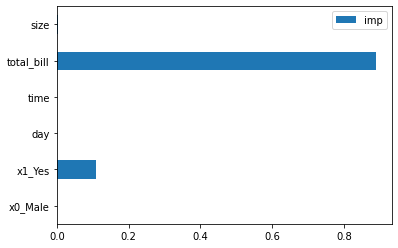

In [ ]:
importance_table.plot(kind = 'barh')

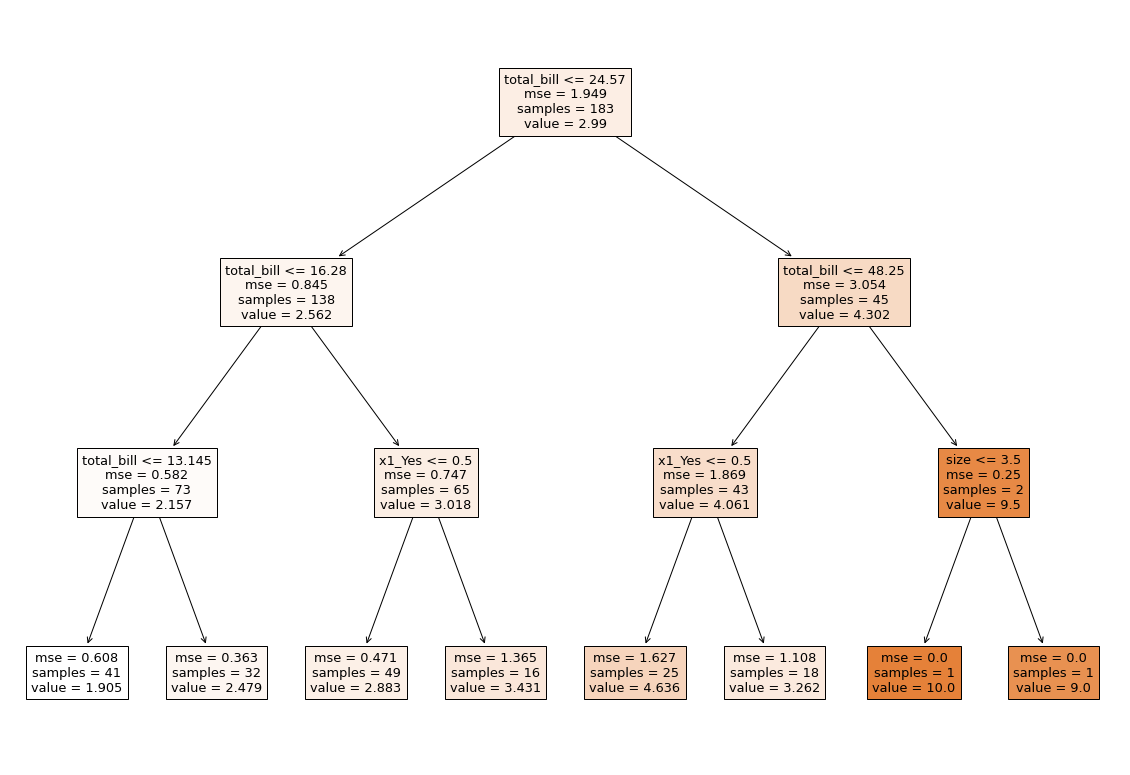

In [ ]:
plt.figure(figsize = (20,14))
plot_tree(model, feature_names = features,filled = True)
plt.show()

# Outlier

This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [ ]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [ ]:
df_assotiation = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real,
})

Text(0, 0.5, 'Weight (Kg)')

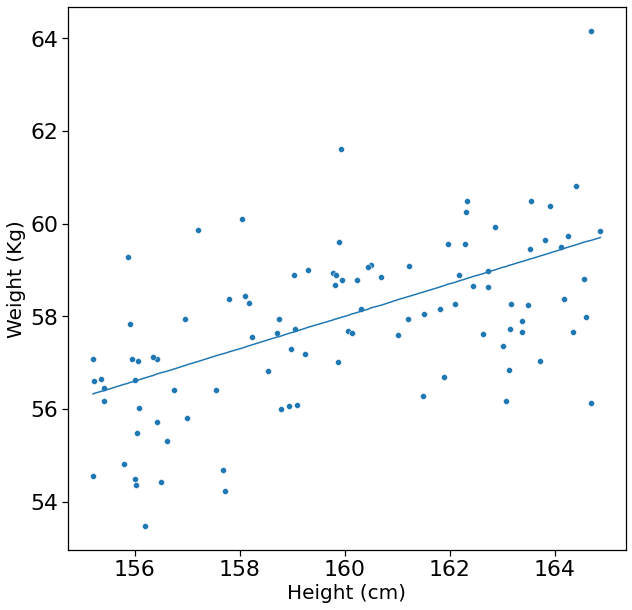

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation)
sns.lineplot(x='x',y='y_real',data = df_assotiation)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

Scatter Plot of two variable without outlier

> ## Global Outlier

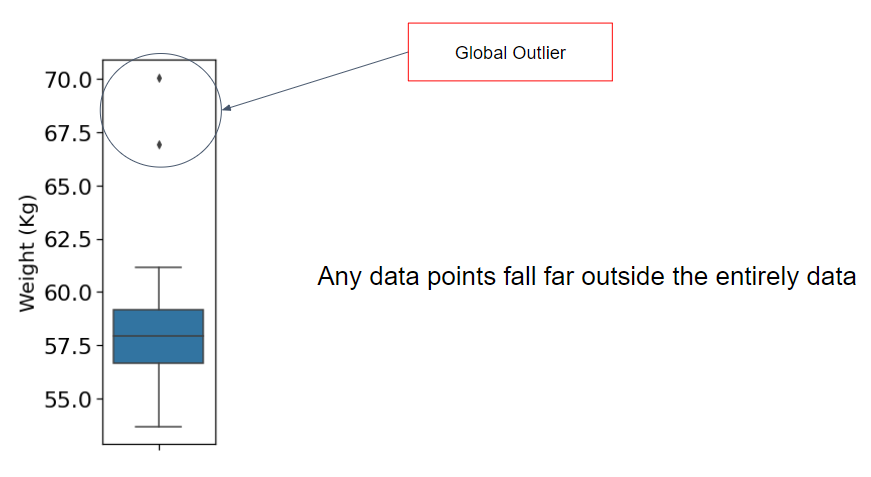

In [ ]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_outlier = df_assotiation.append(df_add)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


Global outlier for weight

Text(0, 0.5, 'Weight (Kg)')

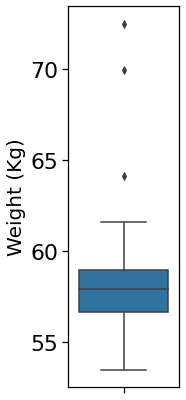

In [ ]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Global outlier for height

Text(0.5, 0, 'Height (cm)')

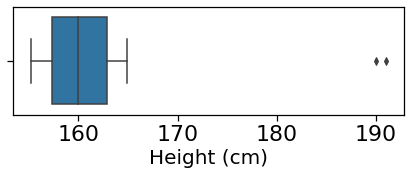

In [ ]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df_assotiation_outlier['x'])
plt.xlabel('Height (cm)', fontsize = 20)

> ## Contextual Outlier

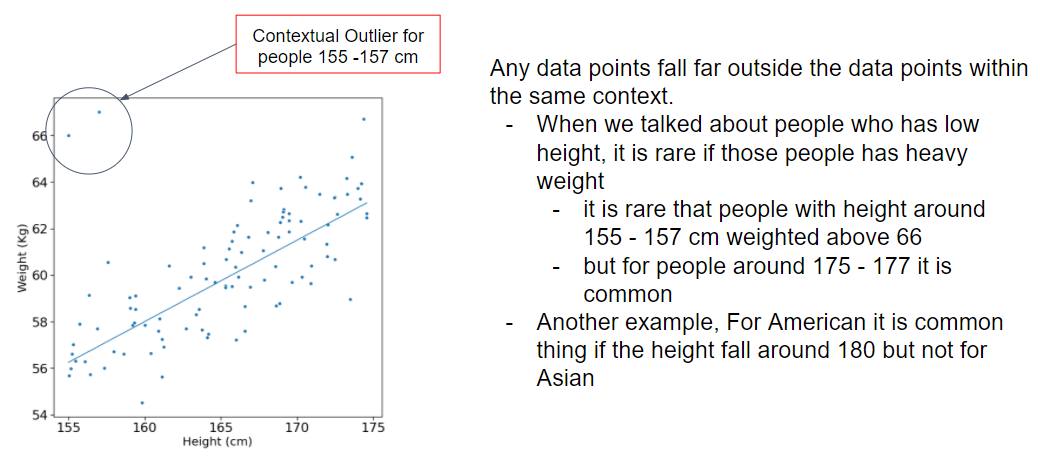

In [ ]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [ ]:
df_assotiation = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real,
})

In [ ]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_contextual = df_assotiation.append(df_add)

contextual outlier : weight around 66 Kg is considered as contextual outlier to 155-157 height.

Text(0, 0.5, 'Weight (Kg)')

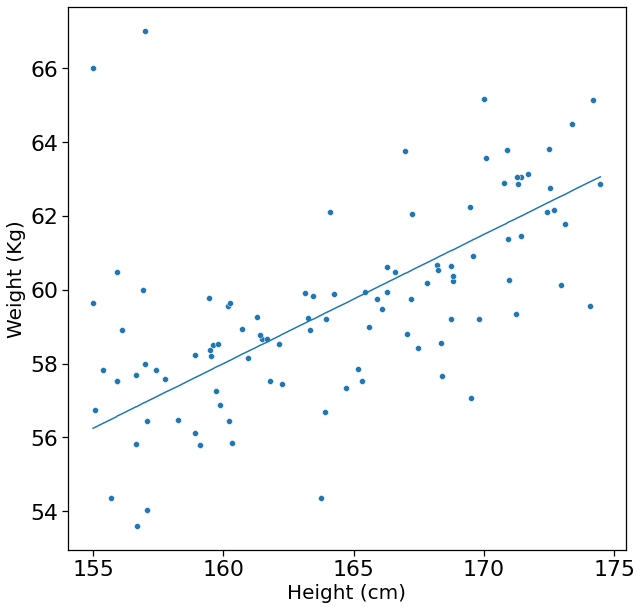

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation_contextual)
sns.lineplot(x='x',y='y_real',data = df_assotiation_contextual)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

> ## Influential Observation

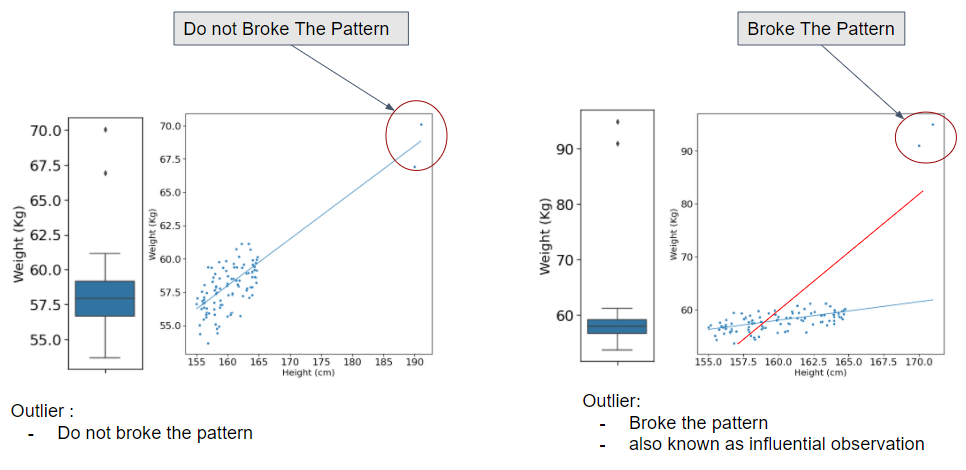

In [ ]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_influenced = df_assotiation.append(df_add)

Text(0, 0.5, 'Weight (Kg)')

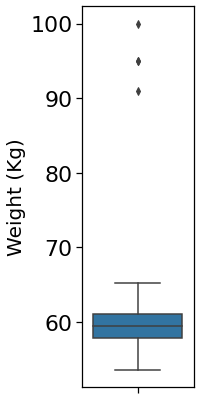

In [ ]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_influenced['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0, 0.5, 'Weight (Kg)')

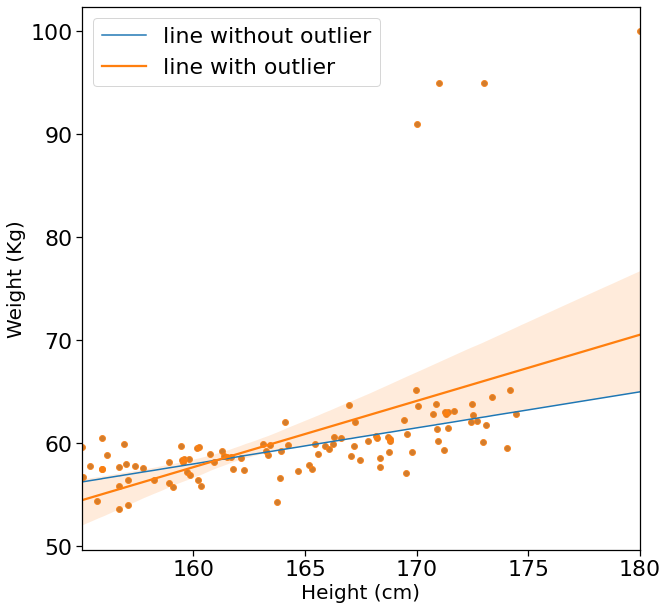

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation_influenced)
sns.lineplot(x='x',y='y_real',data = df_assotiation_influenced)
sns.regplot(x='x',y='y',data = df_assotiation_influenced)
plt.legend(['line without outlier','line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0.5, 1.0, 'residual plot if outlier included')

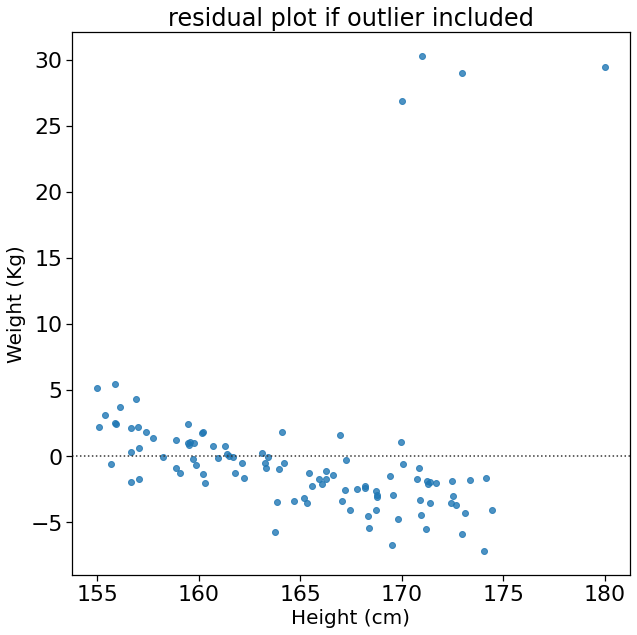

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.residplot(x='x',y='y',data = df_assotiation_influenced)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier included')

Text(0.5, 1.0, 'residual plot if outlier excluded')

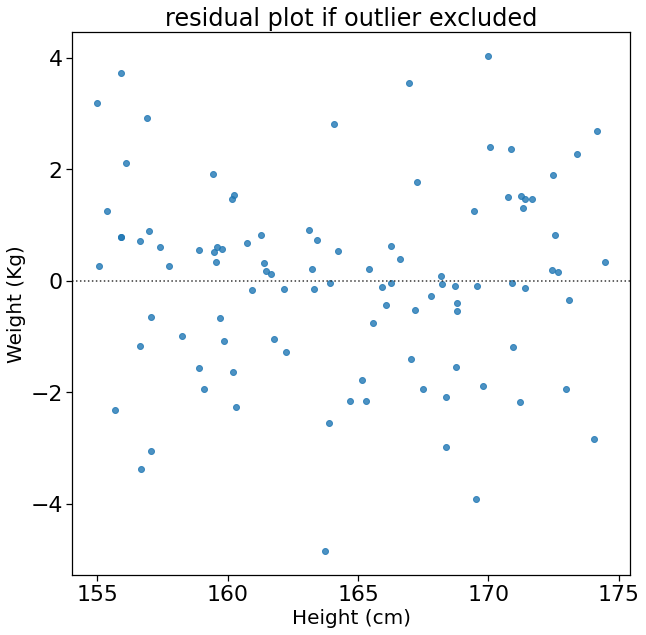

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.residplot(x='x',y='y',data = df_assotiation)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier excluded')

From chart above, we can see a line that influenced by outlier (orange line) and line if there is no outlier (blue line). Outlier just broken the line. Keep in mind that this is not always the case.

# Missing Value

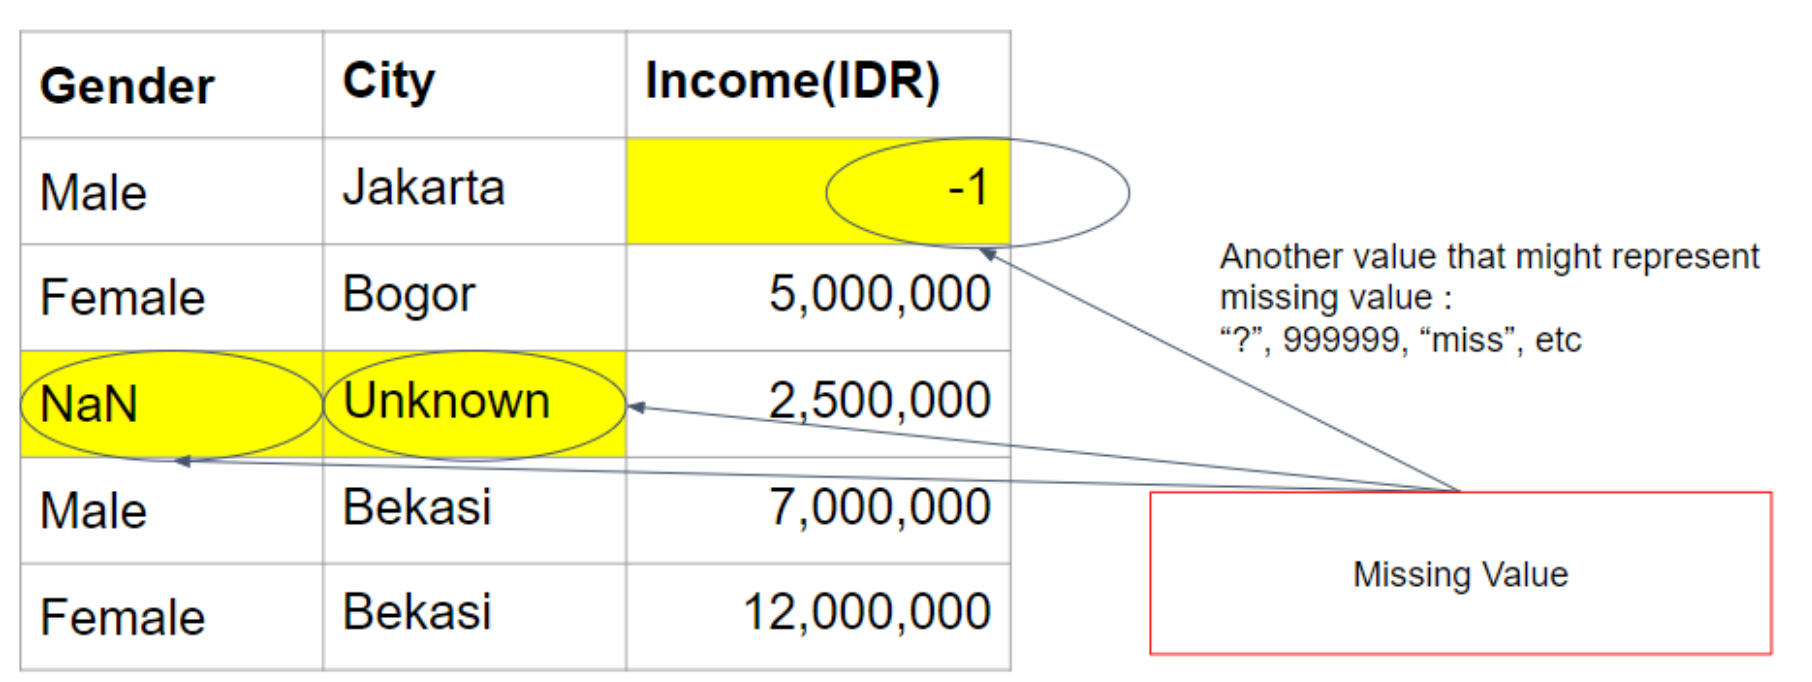

> ## Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
    })

we have a dataframe and each variabels has at least one missing value.

In [ ]:
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


then we input missing value of the each numerical variabel, x1 x2 and x3, using its mean. If you are more interested in median you can change the argument into "median". 

In [ ]:
imp_num = SimpleImputer(strategy='mean')
df[['x1','x2','x3']] = imp_num.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


Missing values in the categorical variables, x4 anf x5, will be inputed using mode.

In [ ]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4','x5']] = imp_mode.fit_transform(df[['x4','x5']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,NaN


for the last variabel we input the missing value using certain value. this technique also can be applied in some condition.

In [ ]:
imp_const = SimpleImputer(strategy='constant', fill_value = 'P')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,P
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,P


> ## Iterative Imputer

interative imputer works for numerical only. You can fill the missing value simultaneusly.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [ ]:
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [ ]:
imp_iter = IterativeImputer(max_iter=10, random_state=0)
df[['x1','x2','x3']] = imp_iter.fit_transform(df[['x1','x2','x3']])

In [ ]:
df

,x1,x2,x3,x4
0,4.30000,2.900000,9.000000,A
1,5.10000,5.100000,11.100000,A
2,7.18363,6.300000,9.823389,C
3,6.30000,4.900000,8.900000,C
4,7.40000,5.073866,9.100000,D
5,9.10000,5.400000,11.000000,D


> ##  Nearest Neighbour Imputer

Nearest negihbour imputer also work for numerical only. You can also fill the missing value simultaneusly.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [ ]:
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [ ]:
imp_knn = KNNImputer(n_neighbors=2, weights="uniform")
df[['x1','x2','x3']] = imp_knn.fit_transform(df[['x1','x2','x3']])

In [ ]:
df

,x1,x2,x3,x4
0,4.3,2.90,9.00,A
1,5.1,5.10,11.10,A
2,7.1,6.30,11.05,C
3,6.3,4.90,8.90,C
4,7.4,5.15,9.10,D
5,9.1,5.40,11.00,D


# Generate New Features : Polynomial

Relationship between variables often appear to be unlinear. Thus, when you still wanna use linear model (logistic regression and linear regression) you can add polynomial features.

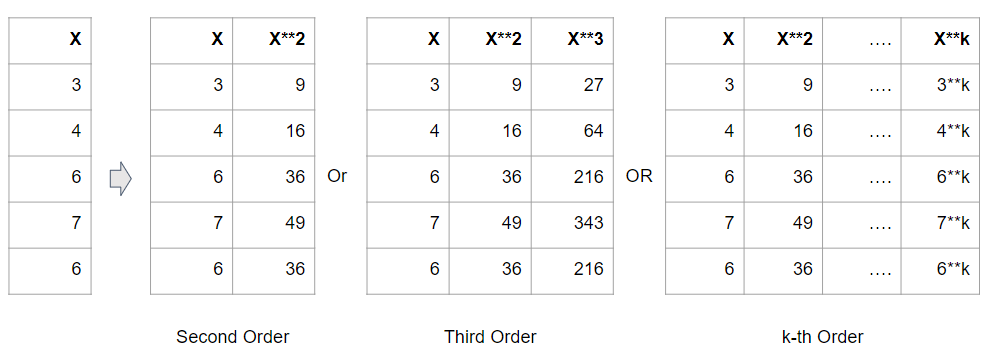

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In the illustration below, you can see how is the effect of the polynomial feature. We will do modeling twice. First, without polynomial features. Second, with polynomial features. The target variabel is
1. (+) a good quality wine : quality > 6
1. (-) a bad quality wine : quality <= 6

<br>
Features: alcohol and density

In [ ]:
wine = pd.read_csv('white_wine.csv')

In [ ]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [ ]:
X = wine[['density','alcohol']]
y = wine['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 2020)

MODEL 1 : without polynomial

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.8538461538461538


Illustration above is the result of a logistic regression without polynomial features. The accuracy of the model is 0.8538. In the next illustration we will add polynomial feature third degree and see the changes.

MODEL 2 : with polynomial

In [ ]:
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False) 
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [ ]:
pd.DataFrame(X_train_poly,columns = poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,0.9936,9.1,0.987241,9.04176,82.81,0.980923,8.983893,82.280016,753.571
1,0.9998,8.7,0.999600,8.69826,75.69,0.999400,8.696520,75.674862,658.503
2,0.9934,9.7,0.986844,9.63598,94.09,0.980330,9.572383,93.469006,912.673
3,0.9910,12.6,0.982081,12.48660,158.76,0.973242,12.374221,157.331160,2000.376
4,0.9931,10.6,0.986248,10.52686,112.36,0.979443,10.454225,111.584716,1191.016
...,...,...,...,...,...,...,...,...,...
385,0.9927,9.4,0.985453,9.33138,88.36,0.978259,9.263261,87.714972,830.584
386,0.9955,10.4,0.991020,10.35320,108.16,0.986561,10.306611,107.673280,1124.864
387,0.9949,9.0,0.989826,8.95410,81.00,0.984778,8.908434,80.586900,729.000
388,0.9974,10.5,0.994807,10.47270,110.25,0.992220,10.445471,109.963350,1157.625


In [ ]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_poly,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test_poly)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.9692307692307692


The changes in performance is significantly increase accuracy from 85.38 % to 96.92 %. From this illustration we know that polynomial feature can improve model performance.

# Binning

There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

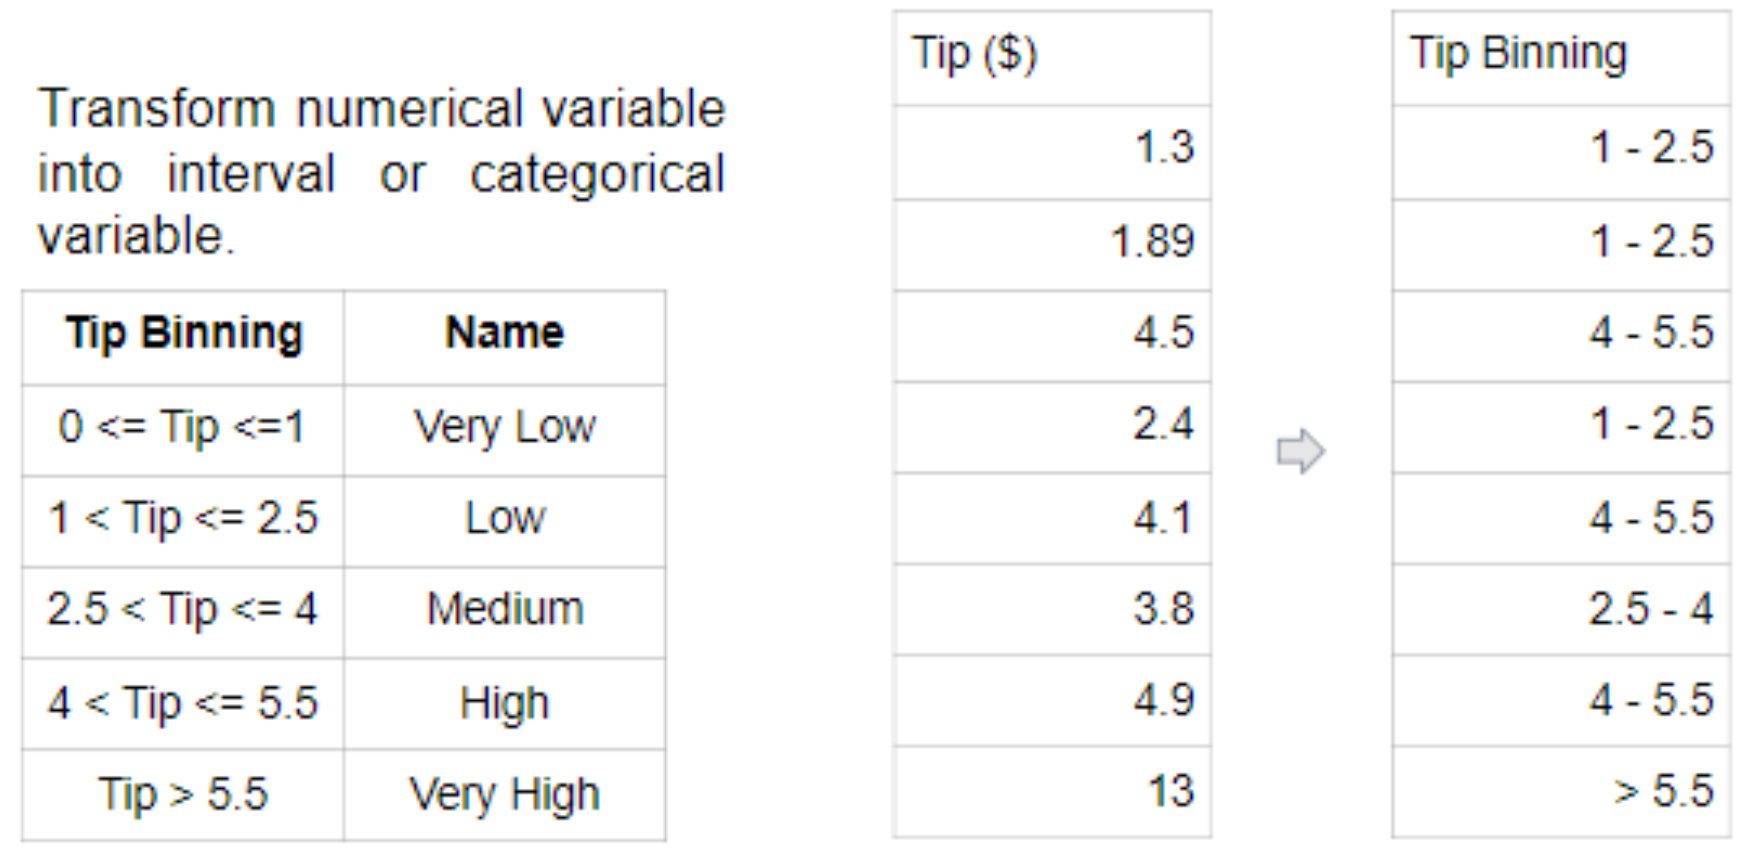

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


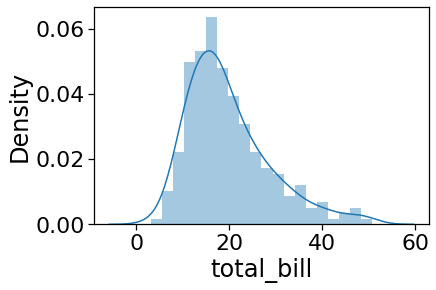

In [ ]:
sns.distplot(tips['total_bill'],bins=20)

In [ ]:
tips['total bill eqfreq'] = pd.qcut(tips['total_bill'],5)
tips['total bill eqfreq encode'] = pd.qcut(tips['total_bill'],5, labels = range(1,6))

In [ ]:
tips['total bill eqintv'] = pd.cut(tips['total_bill'],5)
tips['total bill eqintv encode'] = pd.cut(tips['total_bill'],5, labels = range(1,6))

In [ ]:
tips[['total_bill','total bill eqfreq','total bill eqintv','total bill eqfreq encode','total bill eqintv encode']]

,total_bill,total bill eqfreq,total bill eqintv,total bill eqfreq encode,total bill eqintv encode
0,16.99,"(16.222, 19.818]","(12.618, 22.166]",3,2
1,10.34,"(3.069, 12.636]","(3.022, 12.618]",1,1
2,21.01,"(19.818, 26.098]","(12.618, 22.166]",4,2
3,23.68,"(19.818, 26.098]","(22.166, 31.714]",4,3
4,24.59,"(19.818, 26.098]","(22.166, 31.714]",4,3
...,...,...,...,...,...
239,29.03,"(26.098, 50.81]","(22.166, 31.714]",5,3
240,27.18,"(26.098, 50.81]","(22.166, 31.714]",5,3
241,22.67,"(19.818, 26.098]","(22.166, 31.714]",4,3
242,17.82,"(16.222, 19.818]","(12.618, 22.166]",3,2


> ## Equal Frequencies : Quantile

Binning method which resullted of the equal frequency in each classes and different length of the classes.

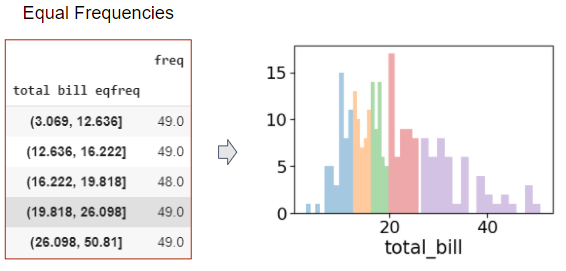

In [ ]:
eqfreq = tips.pivot_table(
    index = 'total bill eqfreq',
    aggfunc = len, 
    values='tip')
eqfreq.columns = ['freq']
eqfreq

,freq
total bill eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


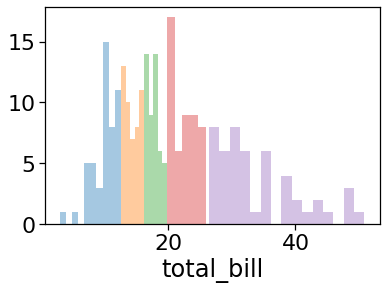

In [ ]:
for i,j in zip(range(1,6),[10,5,5,5,15]):
  sns.distplot(tips[tips['total bill eqfreq encode'] == i]['total_bill'],kde = False,bins = j)

> ## Equal Interval : Uniform

Binning method which resullted of the equal length of the classes and different frequency in each classes.

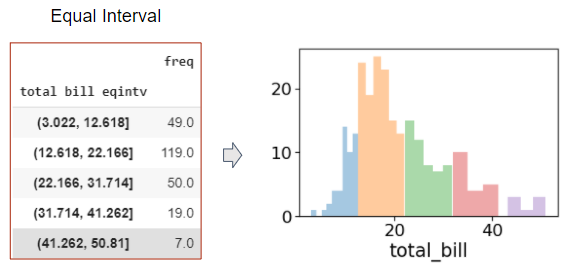

In [ ]:
eqfreq = tips.pivot_table(
    index = 'total bill eqintv',
    aggfunc = len, 
    values='tip')
eqfreq.columns = ['freq']
eqfreq

,freq
total bill eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


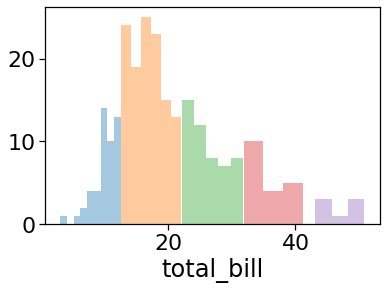

In [ ]:
for i in range(1,6):
  sns.distplot(tips[tips['total bill eqintv encode'] == i]['total_bill'],kde = False)

> ## Binning Effect on Modeling

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
disk = pd.read_csv('disk.csv')

In [ ]:
disk['class'].value_counts()/disk.shape[0]*100

1    51.863963
0    48.136037
Name: class, dtype: float64

Here, we show you the proportion of each classes. the proportion are almost equal. Then we will do binning to the independent variabel 'x' and compute the prportion of the each classes.

In [ ]:
disk['x eqintv'] = pd.cut(disk['x'],7)
disk['x eqintv encode'] = pd.cut(disk['x'],7, labels = range(1,8))

In [ ]:
disk

,x,class,x eqintv,x eqintv encode
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7
...,...,...,...,...
1524,58,1,"(53.0, 60.0]",6
1525,64,1,"(60.0, 67.0]",7
1526,47,0,"(46.0, 53.0]",5
1527,26,1,"(25.0, 32.0]",2


In [ ]:
pd.crosstab(disk['x eqintv'],disk['class'], normalize = 0)

class,0,1
x eqintv,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


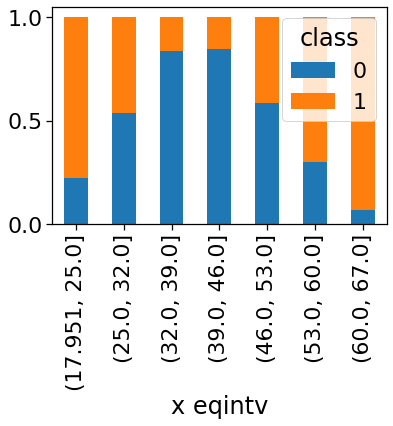

In [ ]:
pd.crosstab(disk['x eqintv'],disk['class'], normalize = 0).plot(kind = 'bar', stacked = True)

from illustration above, you can see that the x variabel alraedy binned into seven categories and you can see the class proportion aswell. The propotion of the '1' class keep decreasing until the fourth class and after that the proportion increase instead. This show a non linear relationship between x and the probability of the '1' class. Adding polynomial feature surely can improve the performance but we will try binning instead.

MODEL 1 : Without binning

This is the modeling when we dont use binning. we dont give any treatment to the feature. The model accuracy is 58.22%.

In [ ]:
X = disk[['x']]
y = disk['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 2020)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.5822454308093995


MODEL 2 : with binning

After we apply binning, the accuracy significantly improve from 58.22% to 69.97%. Binning surely can be used to improve model performance.

In [ ]:
discretize = KBinsDiscretizer(n_bins = 7, encode = 'onehot', strategy = 'uniform')
discretize.fit(X_train) 
X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_disc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test_disc)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.6997389033942559


# Apply Several Preprocessing Method to Modeling at once Part 2

> ## Table Of Contents

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

> ## Data

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [ ]:
df_adult = pd.read_csv('adult.csv')

In [ ]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> ## Missing Value

Missing value in this dataset marked with "?"

In [ ]:
df_adult.replace('?',np.nan,inplace = True)

In [ ]:
df_adult.isnull().sum()/df_adult.shape[0]*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

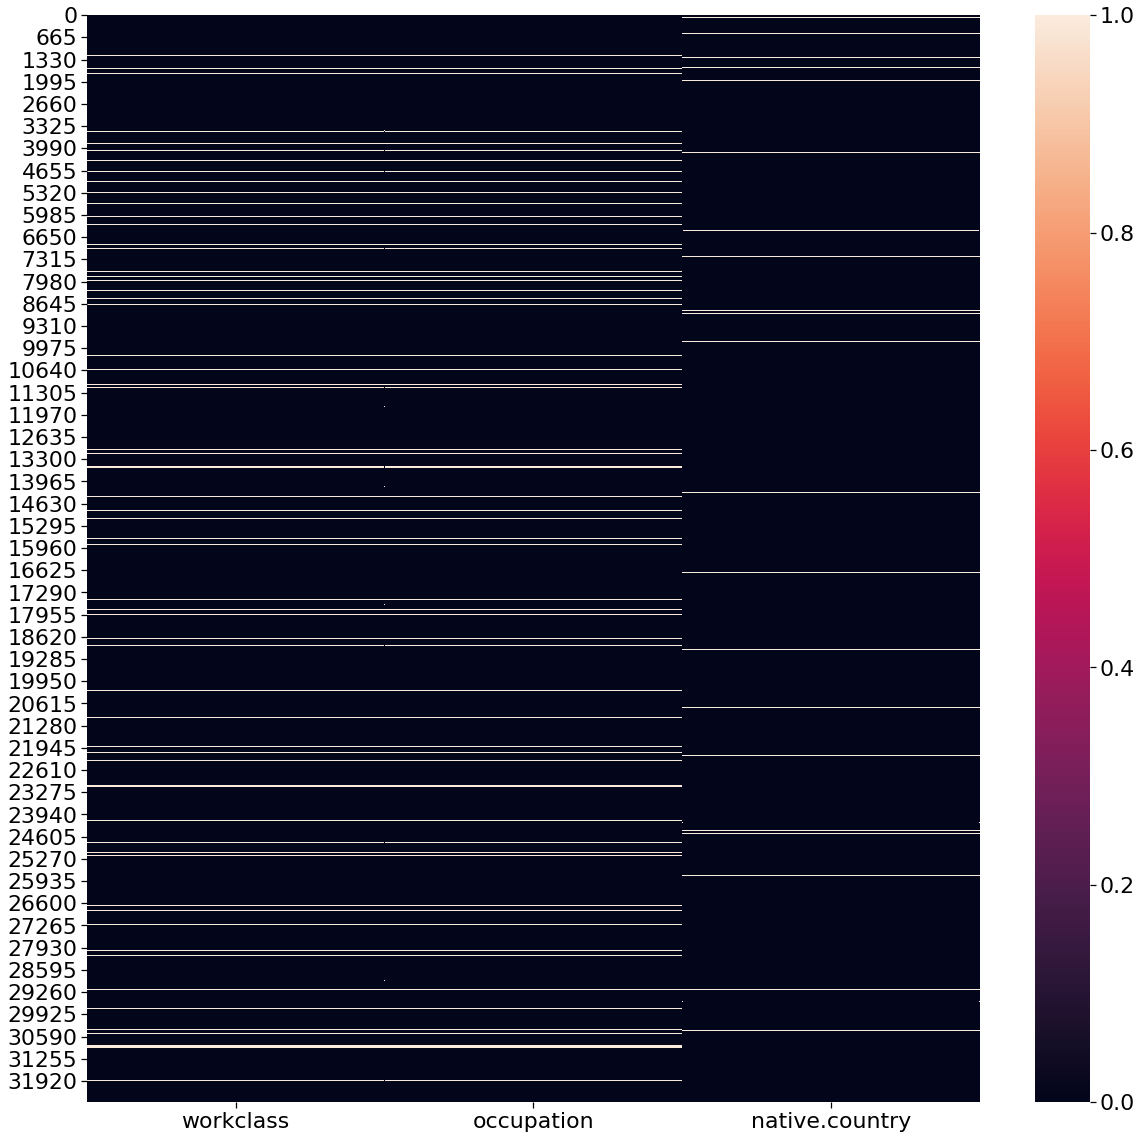

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df_adult[['workclass','occupation','native.country']].isnull())

The Missing Variable:
1. workclass
1. occupation
1. native.country

> ## Preprocessing

In [ ]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
categorical_features = df_adult.columns[df_adult.dtypes == object]
df_adult[categorical_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

out:
1. fnlwgt

In [ ]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [ ]:
X = df_adult.drop(columns = ['fnlwgt','income','education'])
y = np.where(df_adult['income']=='>50K',1,0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

> ## Data Transformation

In [ ]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
29849,20,Private,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States
30319,20,Private,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,55,United-States
1878,47,State-gov,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States
20686,50,Self-emp-not-inc,10,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,NaN
26007,39,Private,10,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines


In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [ ]:
transformer.transformers_

[('one hot encoder',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['relationship', 'race', 'sex']),
 ('binary encoder', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value='NC',
                                 missing_values=nan, strategy='constant',
                                 verbose=0)),
                  ('binary encoder',
                   BinaryEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0))],
           verbose=False), ['workclass',
   'marital.status',
   'occupation',
   'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [ ]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [ ]:
transformer.transformers_[1][1]['binary encoder'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary encoder'].get_feature_names() + ['age','education.num','capital.gain','capital.loss','hours.per.week']
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,0_0,0_1,0_2,0_3,0_4,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,2_4,3_0,3_1,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


> ## Model Fitting and evaluation

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.8355238914138312


> ## Model Properties

In [ ]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [ ]:
importance_table

,imp
x0_Not-in-family,0.000000
x0_Other-relative,0.000000
x0_Own-child,0.000000
x0_Unmarried,0.000000
x0_Wife,0.000000
x1_Asian-Pac-Islander,0.000000
x1_Black,0.000000
x1_Other,0.000000
x1_White,0.000000
x2_Male,0.000000


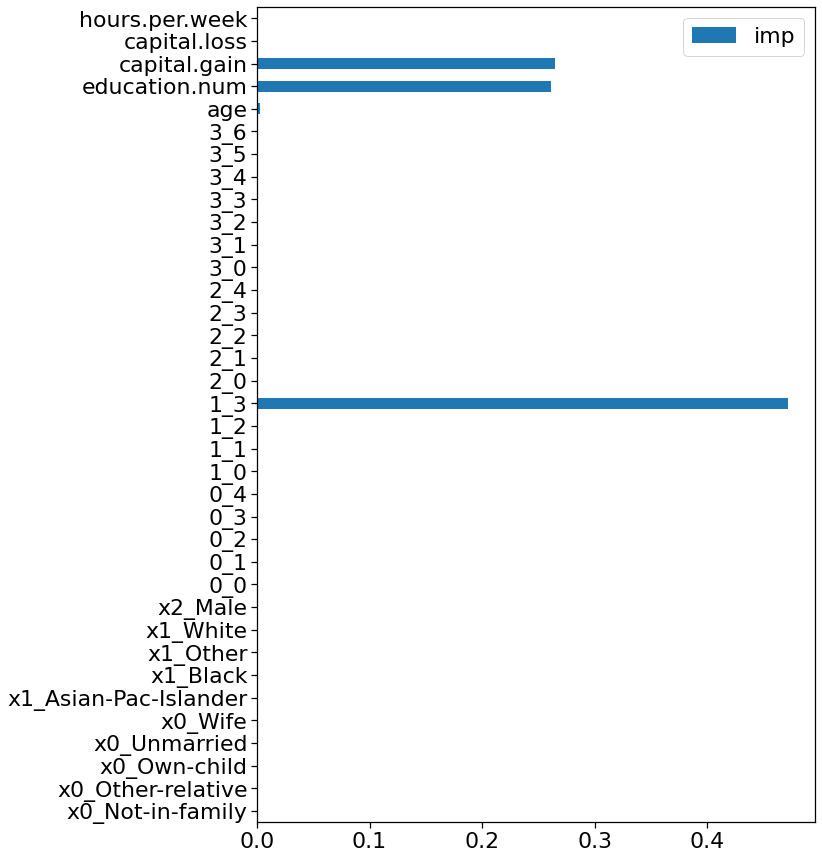

In [ ]:
importance_table.plot(kind = 'barh', figsize = (10,15))

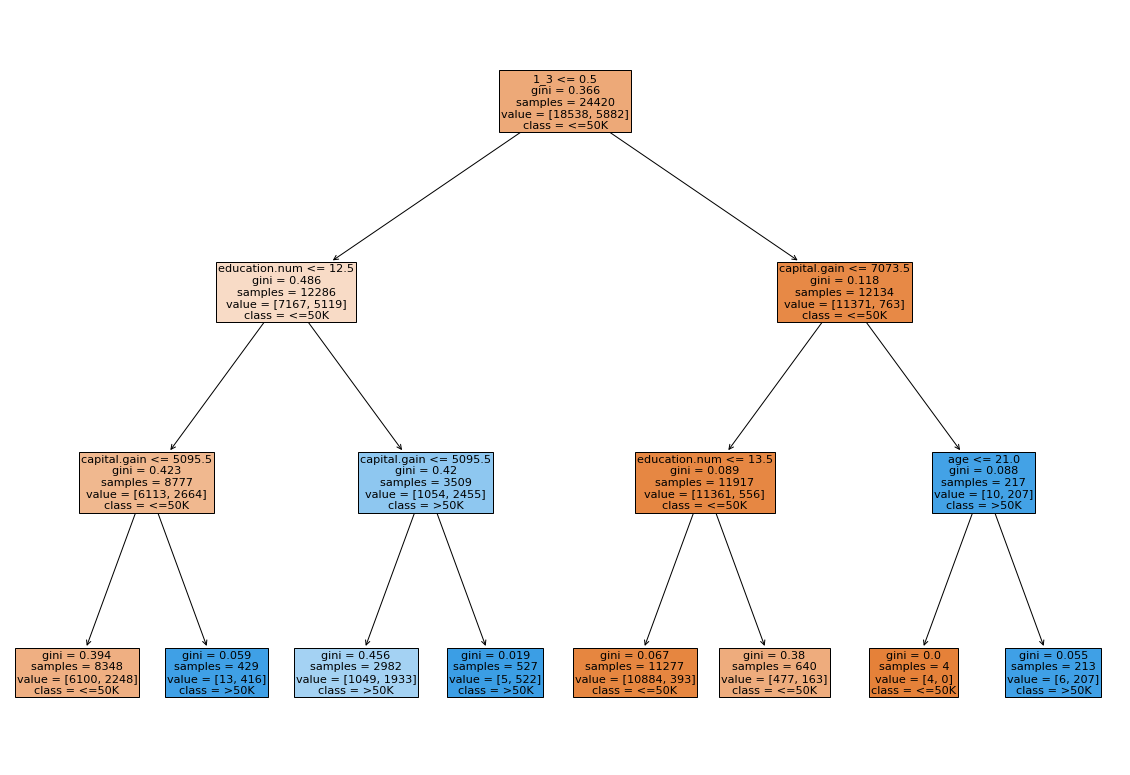

In [ ]:
plt.figure(figsize = (20,14))
plot_tree(model, feature_names = features,filled = True, class_names = ['<=50K','>50K'])
plt.show()

# Feature Selection

> ## Table Of Contents

1. data transform
1. feature selection : slect percentile
1. model fitting and evaluation : logistic regression

we will continue the analysis in the illustration before with adding feature selection in the process.

In [ ]:
from sklearn.feature_selection import SelectPercentile

> ## Data Transformation

In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


> ## Feature Selection Process

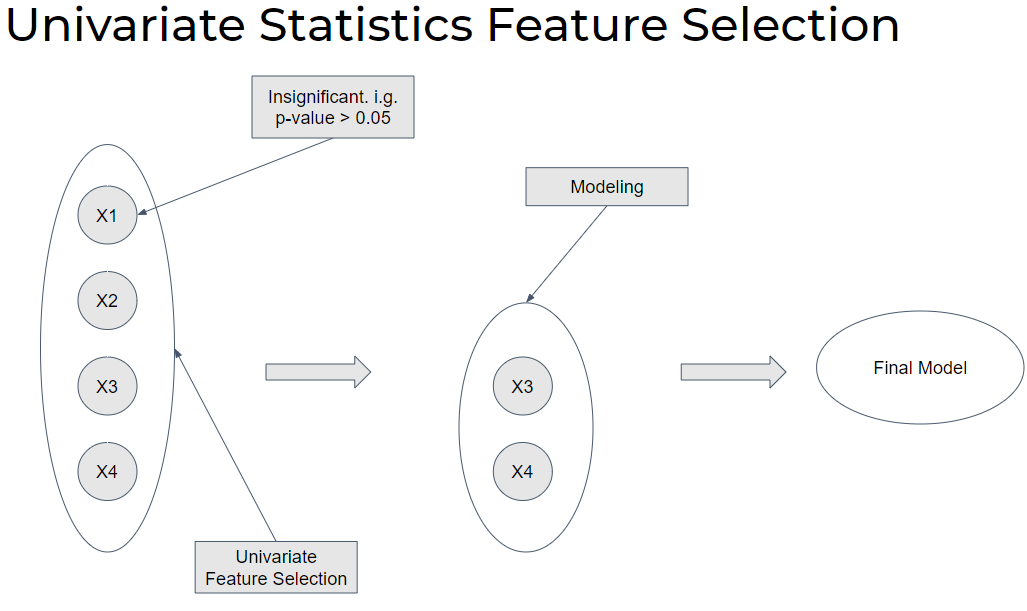

In [ ]:
select = SelectPercentile(percentile = 50)
select.fit(X_train_preprocessed, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [10 15 19 24] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=50,
                 score_func=<function f_classif at 0x7f1899c07bf8>)

In [ ]:
X_train_preprocessed_selected = select.transform(X_train_preprocessed)
X_test_preprocessed_selected = select.transform(X_test_preprocessed)

In [ ]:
print('before selection',X_train_preprocessed.shape)
print('after selection',X_train_preprocessed_selected.shape)

before selection (24420, 36)
after selection (24420, 18)


The selected feature

In [ ]:
mask = select.get_support()

In [ ]:
selected_features = pd.DataFrame({
    'indicator':mask,
    'features':features
})
selected_features[selected_features['indicator']==True]

,indicator,features
0,True,x0_Not-in-family
1,True,x0_Other-relative
2,True,x0_Own-child
3,True,x0_Unmarried
4,True,x0_Wife
6,True,x1_Black
8,True,x1_White
9,True,x2_Male
13,True,0_3
16,True,1_1


> ## Model Fitting and evaluation

In [ ]:
model = LogisticRegression(max_iter = 1000, solver = 'liblinear', C = 10)
model.fit(X_train_preprocessed_selected,y_train)
print('score', model.score(X_test_preprocessed_selected, y_test))

score 0.8395774474880235


In [ ]:
model.coef_[0]

array([-5.14443973e-01, -1.39944647e+00, -1.78903471e+00, -7.05858086e-01,
        1.17677959e+00, -4.28883007e-02,  1.76425482e-01,  6.66296070e-01,
       -1.05928400e-01, -3.15957918e-01,  3.67547612e-01, -1.14391028e+00,
       -1.80627577e-01,  2.33312980e-02,  3.60953290e-01,  3.17641003e-04,
        6.00247600e-04,  3.06997710e-02])

> ## Model Properties

In [ ]:
coef_table = pd.DataFrame({
    'features':selected_features[selected_features['indicator']==True]['features'],
    'coef':model.coef_[0]
})

In [ ]:
coef_table

,features,coef
0,x0_Not-in-family,-0.514444
1,x0_Other-relative,-1.399446
2,x0_Own-child,-1.789035
3,x0_Unmarried,-0.705858
4,x0_Wife,1.176780
6,x1_Black,-0.042888
8,x1_White,0.176425
9,x2_Male,0.666296
13,0_3,-0.105928
16,1_1,-0.315958
